In [116]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.neural_network import MLPClassifier


In [117]:
# A1: Functions for various units

# Summation Unit
def summationUnit(weights, inputs):
    # Summation of weighted inputs
    return sum(w * i for w, i in zip(weights, inputs))

# Activation Functions
def stepFunction(x):#Step Function
    return 1 if x >= 0 else 0

def bipolarStepFunction(x):#Bipolar Step Function
    return 1 if x >= 0 else -1

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def tanh(x):#Tanh Function
    return math.tanh(x)

def ReLU(x):#ReLU Function
    return x if x > 0 else 0

def leakyReLU(x, alpha=0.01):#Leaky ReLU Function
    return x if x > 0 else alpha * x

# Comparator Unit for Error Calculation
def errorCalculator(predicted, actual):
    return actual - predicted


   


Final Weights: [-0.10000000000000765, 0.1000000000000001, 0.05000000000000032]
Total Epochs: 130


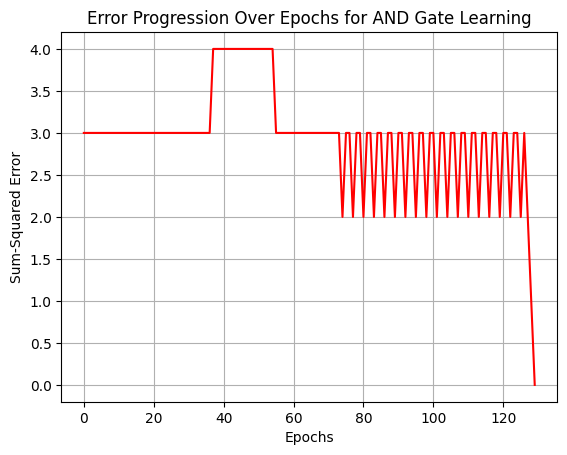

In [118]:
# A2: Perceptron for AND gate using Step Activation Function

def perceptronAndGate(inputs, initialWeights, learningRate=0.05, maxEpochs=1000, convergenceError=0.002):
    weights = initialWeights[:]  # initial weights
    epoch = 0
    errors = []
    converged = False
    
    while not converged and epoch < maxEpochs:
        totalError = 0
        for inputPair, target in inputs:
            # Calculate weighted sum + bias
            summation = summationUnit(weights, [1] + inputPair)  # Adding bias as input 1
            # Apply step activation function
            output = stepFunction(summation)
            # Calculate error
            error = errorCalculator(output, target)
            totalError += error ** 2  # Sum-squared error
            
            # Update weights
            for i in range(len(weights)):
                weights[i] += learningRate * error * ([1] + inputPair)[i]
        #updating the error list
        errors.append(totalError)
        #checking for convergence
        if totalError <= convergenceError:
            converged = True
        epoch += 1
    
    return weights, errors, epoch

# Initial weights and inputs for AND gate
initialWeights = [10, 0.2, -0.75]
andGateInputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]

# Train perceptron
finalWeights, errorProgression, totalEpochs = perceptronAndGate(andGateInputs, initialWeights)

print("Final Weights:", finalWeights)
print("Total Epochs:", totalEpochs)


plt.plot(range(totalEpochs), errorProgression, linestyle='-', color='r')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Progression Over Epochs for AND Gate Learning')
plt.grid(True)
plt.show()


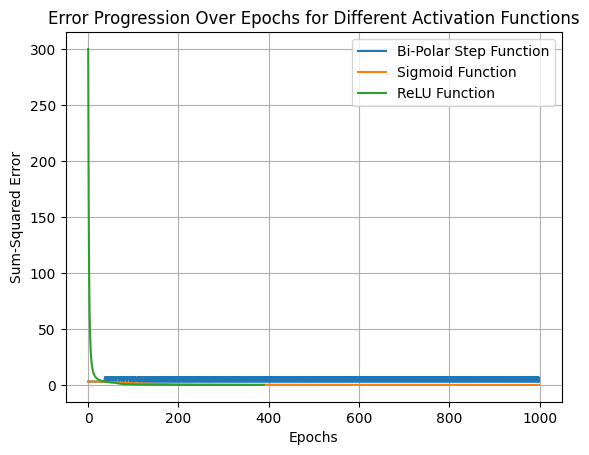

Activation Function: Bi-Polar Step Function
Final Weights: [-0.0999999999999975, 0.09999999999999902, 0.05000000000000643]
Total Epochs: 1000

Activation Function: Sigmoid Function
Final Weights: [-6.1353130787344305, 3.970833206406072, 3.963948347259991]
Total Epochs: 1000

Activation Function: ReLU Function
Final Weights: [-0.9277447198109581, 0.9511600082912268, 0.9498108559260638]
Total Epochs: 390



In [144]:
def perceptronWithActivation(inputs, initialWeights, activationFunction, learningRate=0.05, maxEpochs=1000, convergenceError=0.002):
    weights = initialWeights[:]  # Copy initial weights
    epoch = 0
    errors = []
    converged = False
    
    while not converged and epoch < maxEpochs:
        totalError = 0
        for inputPair, target in inputs:
            # Calculate weighted sum + bias
            summation = summationUnit(weights, [1] + inputPair)  # Adding bias as input 1
            # Apply the selected activation function
            output = activationFunction(summation)
            # Calculate error
            error = errorCalculator(output, target)
            totalError += error ** 2  # Sum-squared error
            
            # Update weights
            for i in range(len(weights)):
                weights[i] += learningRate * error * ([1] + inputPair)[i]
        
        errors.append(totalError)
        if totalError <= convergenceError:
            converged = True
        epoch += 1
    
    return weights, errors, epoch

# Initial weights and inputs for AND gate
initialWeights = [10, 0.2, -0.75]
andGateInputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]

# Train perceptron with different activation functions
activationFunctions = [bipolarStepFunction, sigmoid, ReLU]
activationNames = ['Bi-Polar Step Function', 'Sigmoid Function', 'ReLU Function']

results = {}

for activation, name in zip(activationFunctions, activationNames):
    finalWeights, errorProgression, totalEpochs = perceptronWithActivation(andGateInputs, initialWeights, activation)
    results[name] = {'weights': finalWeights, 'errors': errorProgression, 'epochs': totalEpochs}

    # Plotting the error progression
    plt.plot(range(totalEpochs), errorProgression, linestyle='-', label=name)


plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Progression Over Epochs for Different Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


for name, result in results.items():
    print(f"Activation Function: {name}")
    print(f"Final Weights: {result['weights']}")
    print(f"Total Epochs: {result['epochs']}\n")

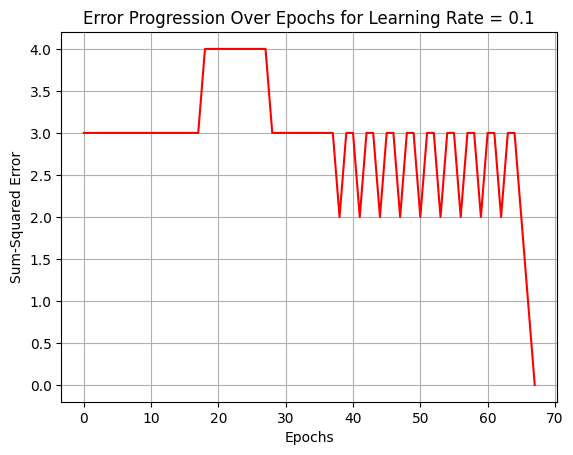

Learning Rate: 0.1
Final Weights: [-0.2999999999999812, 0.19999999999999998, 0.15000000000000005]
Total Epochs: 68


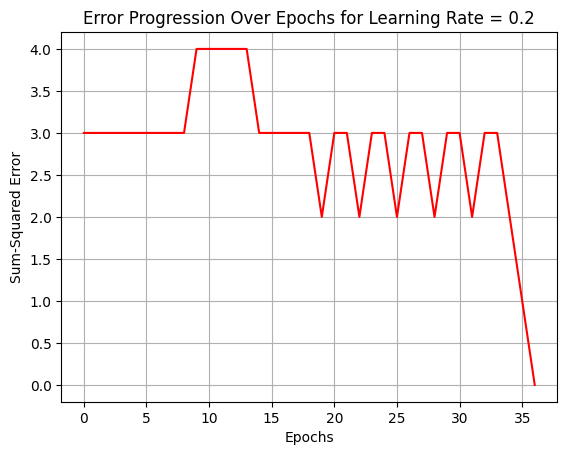

Learning Rate: 0.2
Final Weights: [-0.599999999999998, 0.39999999999999997, 0.24999999999999978]
Total Epochs: 37


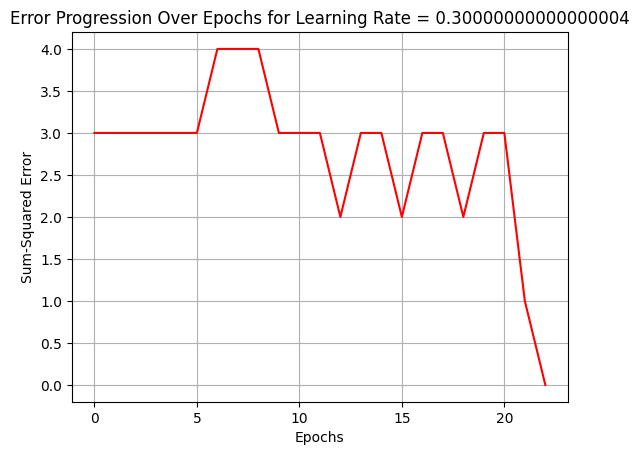

Learning Rate: 0.30000000000000004
Final Weights: [-0.20000000000000107, 0.19999999999999996, 0.15000000000000036]
Total Epochs: 23


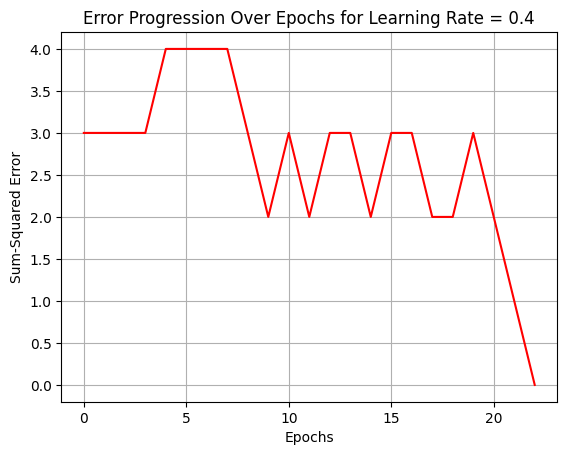

Learning Rate: 0.4
Final Weights: [-1.2000000000000044, 1.0000000000000002, 0.4500000000000002]
Total Epochs: 23


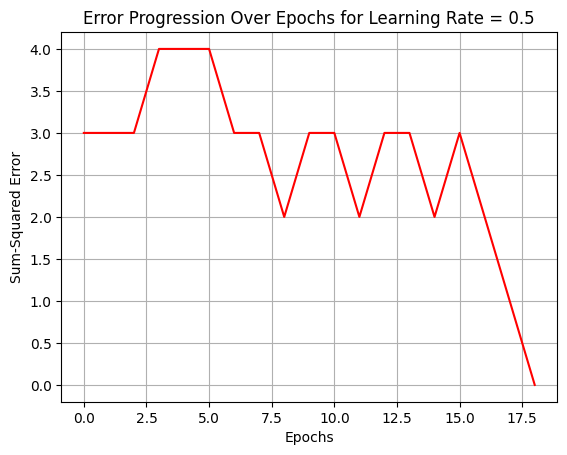

Learning Rate: 0.5
Final Weights: [-1.5, 1.2, 0.75]
Total Epochs: 19


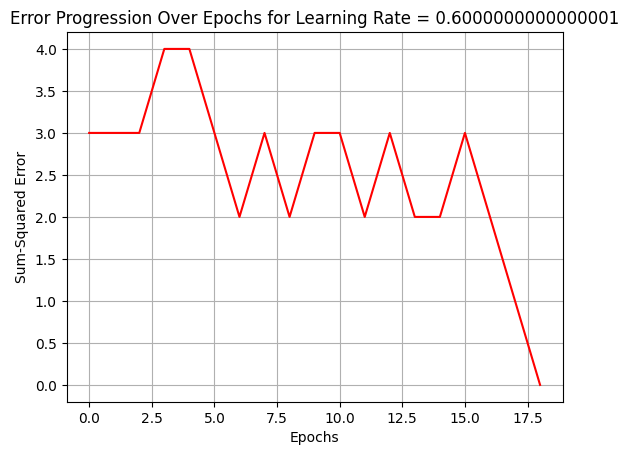

Learning Rate: 0.6000000000000001
Final Weights: [-1.9999999999999973, 1.4000000000000004, 1.0500000000000003]
Total Epochs: 19


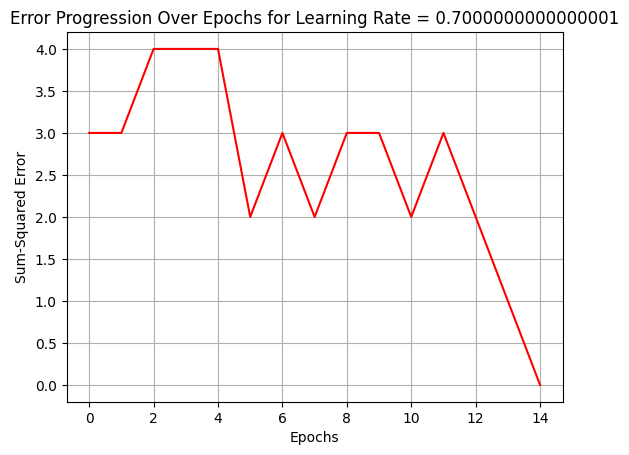

Learning Rate: 0.7000000000000001
Final Weights: [-1.9000000000000008, 1.6, 0.65]
Total Epochs: 15


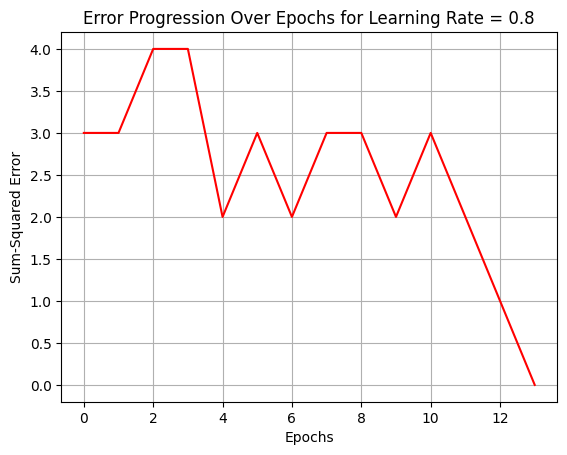

Learning Rate: 0.8
Final Weights: [-2.0000000000000004, 1.8, 0.8499999999999996]
Total Epochs: 14


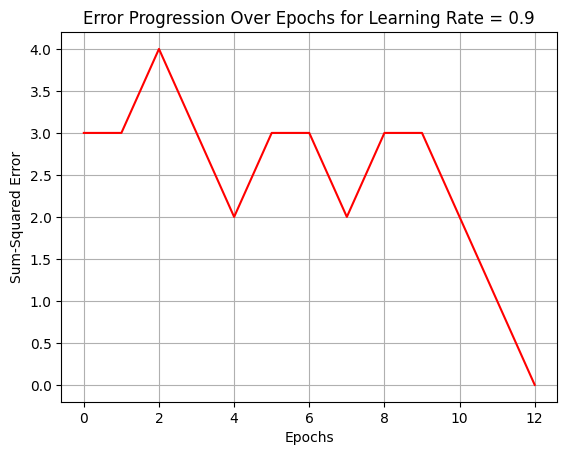

Learning Rate: 0.9
Final Weights: [-2.600000000000002, 2.0, 1.0500000000000003]
Total Epochs: 13


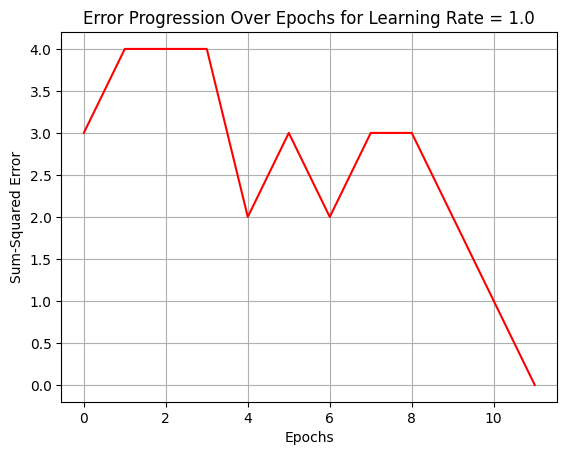

Learning Rate: 1.0
Final Weights: [-3.0, 2.2, 1.25]
Total Epochs: 12


In [120]:
initialWeights = [10, 0.2, -0.75]
andGateInputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]

# Learning rates to test
learningRates = [0.1 * i for i in range(1, 11)]

# Store the results for each learning rate
results = {}

for lr in learningRates:
    finalWeights, errorProgression, totalEpochs = perceptronAndGate(andGateInputs, initialWeights, lr)
    results[lr] = {
        "finalWeights": finalWeights,
        "errorProgression": errorProgression,
        "totalEpochs": totalEpochs
    }

# Plotting the results separately for each learning rate
for lr in learningRates:
    plt.figure()
    plt.plot(range(results[lr]['totalEpochs']), results[lr]['errorProgression'], linestyle='-', color='r')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title(f'Error Progression Over Epochs for Learning Rate = {lr}')
    plt.grid(True)
    plt.show()

    print(f"Learning Rate: {lr}")
    print("Final Weights:", results[lr]['finalWeights'])
    print("Total Epochs:", results[lr]['totalEpochs'])
    print("="*50)


Final Weights for XOR Gate: [0.09999999999999236, -0.09999999999999969, -0.09999999999999969]
Total Epochs for XOR Gate: 1000


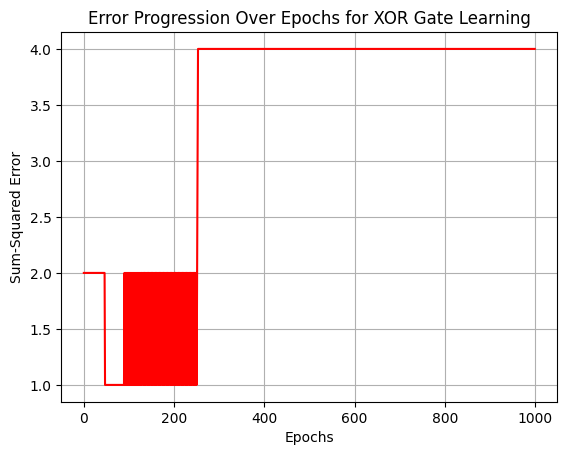

In [121]:
# Perceptron learning function
def perceptronXorGate(inputs, initialWeights, learningRate, maxEpochs=1000, convergenceError=0.002):
    weights = initialWeights[:]  # Copy initial weights
    epoch = 0
    converged = False
    errorProgression = []
    
    while not converged and epoch < maxEpochs:
        totalError = 0
        for inputPair, target in inputs:
            # Calculate weighted sum + bias
            summation = summationUnit(weights, [1] + inputPair)  # Adding bias as input 1
            # Apply step activation function
            output = stepFunction(summation)
            # Calculate error
            error = errorCalculator(output, target)
            totalError += error ** 2  # Sum-squared error
            
            # Update weights
            for i in range(len(weights)):
                weights[i] += learningRate * error * ([1] + inputPair)[i]
        
        errorProgression.append(totalError)
        if totalError <= convergenceError:
            converged = True
        epoch += 1
    
    return weights, errorProgression, epoch

# Initial weights and inputs for XOR gate
initialWeights = [10, 0.2, -0.75]
xorGateInputs = [([0, 0], 0), ([0, 1], 1), ([1, 0], 1), ([1, 1], 0)]

# Learning rate for A1
learningRate = 0.05

# Train perceptron for XOR gate
finalWeights, errorProgression, totalEpochs = perceptronXorGate(xorGateInputs, initialWeights, learningRate)

print("Final Weights for XOR Gate:", finalWeights)
print("Total Epochs for XOR Gate:", totalEpochs)

plt.plot(range(totalEpochs), errorProgression, linestyle='-', color='r')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Progression Over Epochs for XOR Gate Learning')
plt.grid(True)
plt.show()


Activation Function: Bi-Polar Step
Final Weights: [0.1999999999999919, -0.09999999999999969, -0.15000000000000013]
Total Epochs: 1000


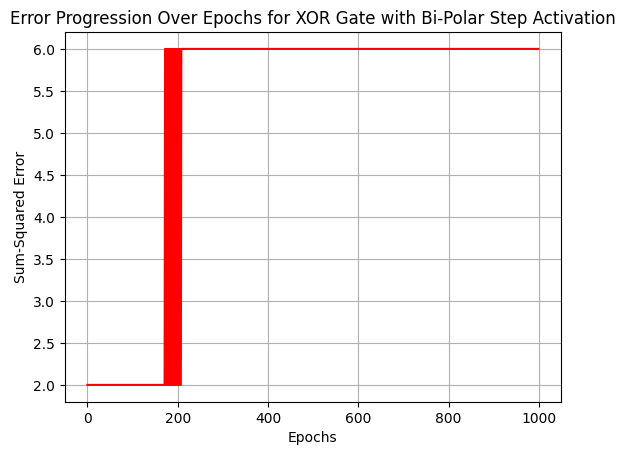

Activation Function: Sigmoid
Final Weights: [0.09999999999999236, -0.09999999999999969, -0.09999999999999969]
Total Epochs: 1000


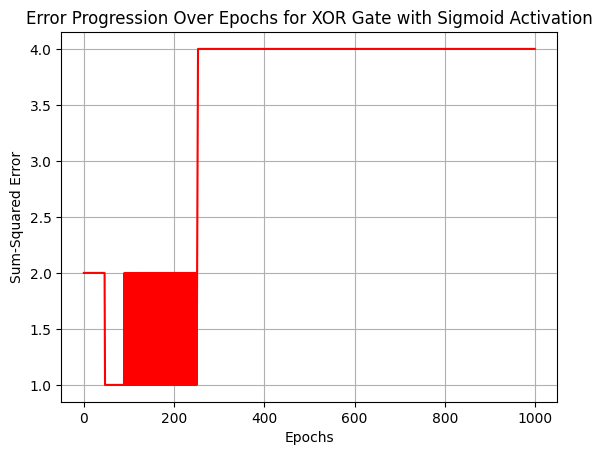

Activation Function: ReLU
Final Weights: [0.09999999999999236, -0.09999999999999969, -0.09999999999999969]
Total Epochs: 1000


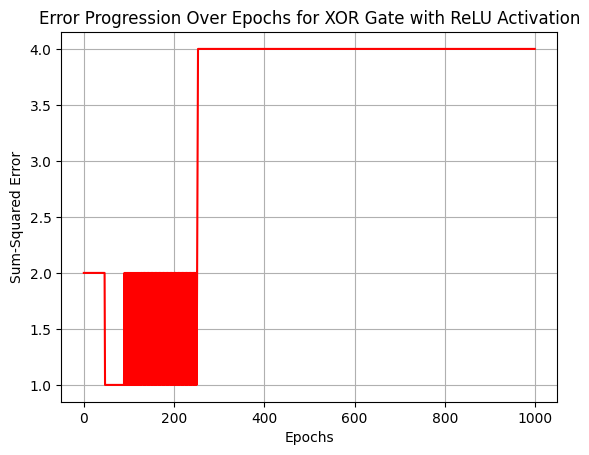

In [122]:
# Modified Perceptron for Different Activation Functions
def perceptronWithActivation(inputs, initialWeights, learningRate, activationFunction, maxEpochs=1000, convergenceError=0.002):
    weights = initialWeights[:]
    epoch = 0
    converged = False
    errorProgression = []
    
    while not converged and epoch < maxEpochs:
        totalError = 0
        for inputPair, target in inputs:
            # Calculate weighted sum + bias
            summation = summationUnit(weights, [1] + inputPair)
            # Apply the specified activation function
            output = activationFunction(summation)
            # For non-binary output (like sigmoid), we use thresholding to calculate binary error
            if activationFunction == sigmoid:
                output = 1 if output >= 0.5 else 0
            elif activationFunction == ReLU:
                output = 1 if output > 0 else 0
            # Calculate error
            error = errorCalculator(output, target)
            totalError += error ** 2
            
            # Update weights
            for i in range(len(weights)):
                weights[i] += learningRate * error * ([1] + inputPair)[i]
        
        errorProgression.append(totalError)
        if totalError <= convergenceError:
            converged = True
        epoch += 1
    
    return weights, errorProgression, epoch

# Activation Functions to Test
activationFunctions = [bipolarStepFunction, sigmoid, ReLU]
activationFunctionNames = ["Bi-Polar Step", "Sigmoid", "ReLU"]

# Train perceptron for each activation function
for activationFunction, name in zip(activationFunctions, activationFunctionNames):
    finalWeights, errorProgression, totalEpochs = perceptronWithActivation(xorGateInputs, initialWeights, learningRate, activationFunction)
    
    print(f"Activation Function: {name}")
    print("Final Weights:", finalWeights)
    print("Total Epochs:", totalEpochs)
    

    plt.figure()
    plt.plot(range(totalEpochs), errorProgression, linestyle='-', color='r')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title(f'Error Progression Over Epochs for XOR Gate with {name} Activation')
    plt.grid(True)
    plt.show()

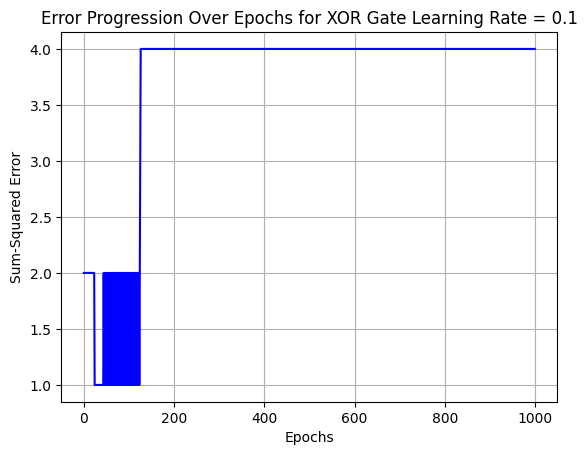

Learning Rate: 0.1
Final Weights: [0.1000000000000188, -0.19999999999999982, -0.14999999999999997]
Total Epochs: 1000


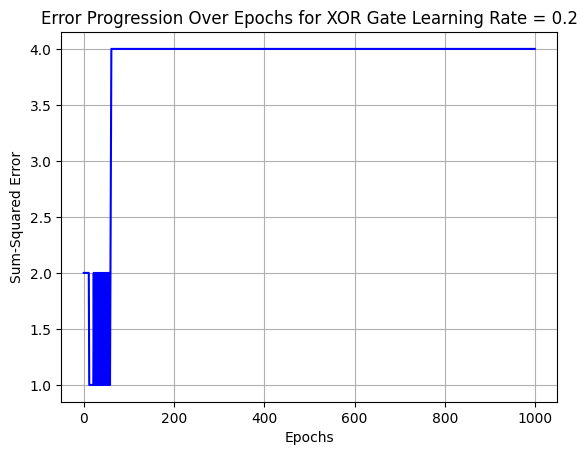

Learning Rate: 0.2
Final Weights: [0.20000000000000207, -0.4000000000000001, -0.35000000000000026]
Total Epochs: 1000


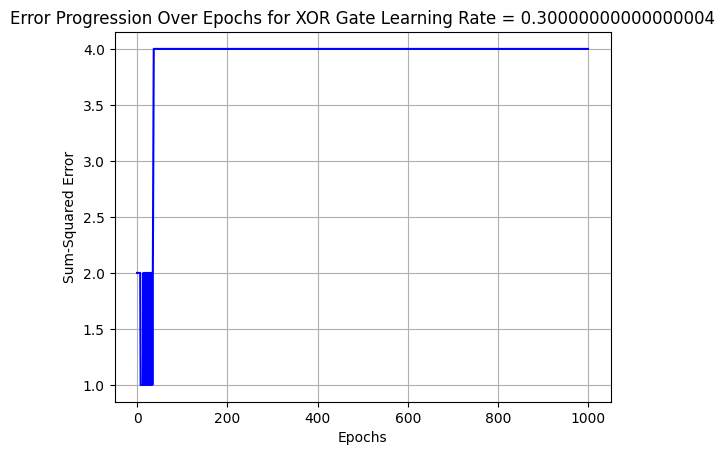

Learning Rate: 0.30000000000000004
Final Weights: [0.6999999999999991, -0.7, -0.7499999999999998]
Total Epochs: 1000


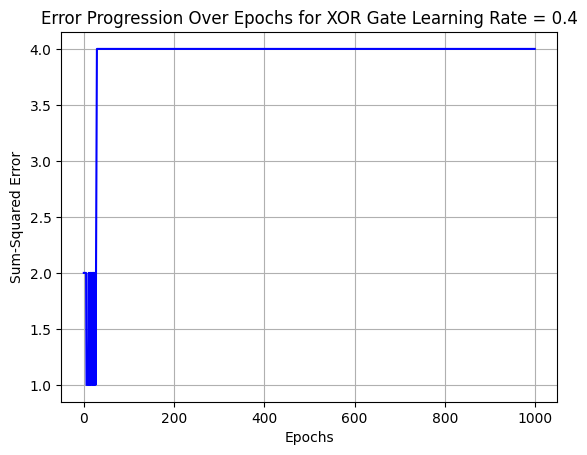

Learning Rate: 0.4
Final Weights: [0.3999999999999957, -0.5999999999999999, -0.7499999999999999]
Total Epochs: 1000


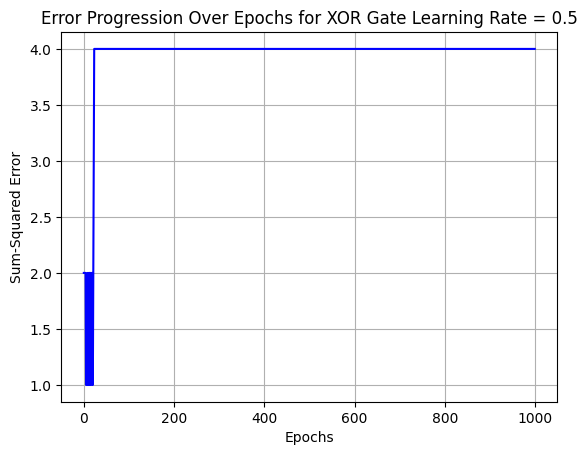

Learning Rate: 0.5
Final Weights: [0.5, -0.7999999999999998, -0.75]
Total Epochs: 1000


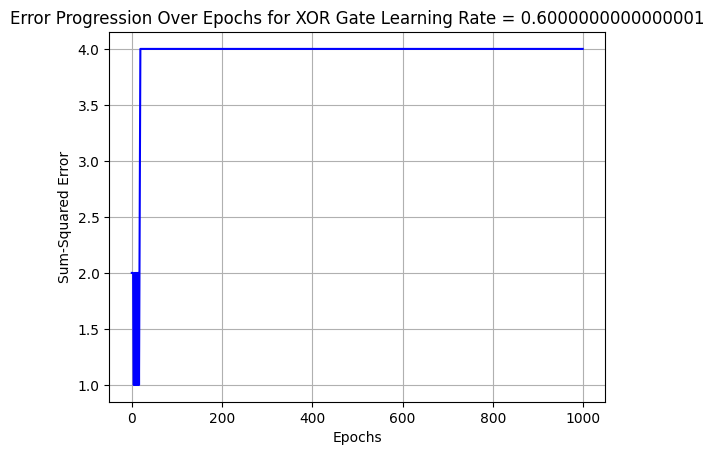

Learning Rate: 0.6000000000000001
Final Weights: [0.400000000000003, -1.0, -0.75]
Total Epochs: 1000


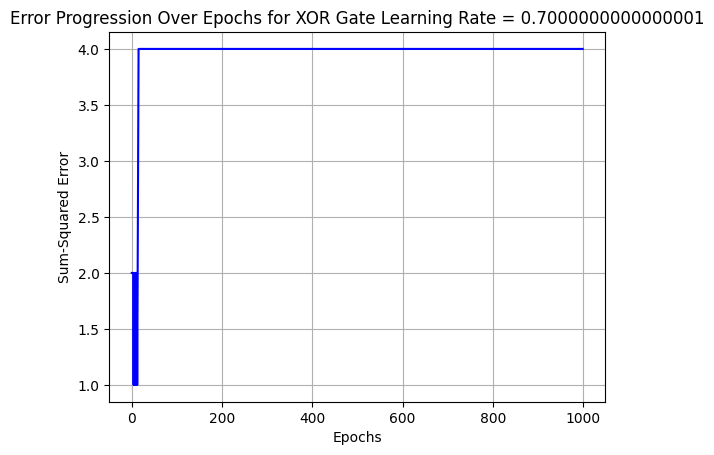

Learning Rate: 0.7000000000000001
Final Weights: [0.8999999999999996, -1.2000000000000002, -1.4500000000000002]
Total Epochs: 1000


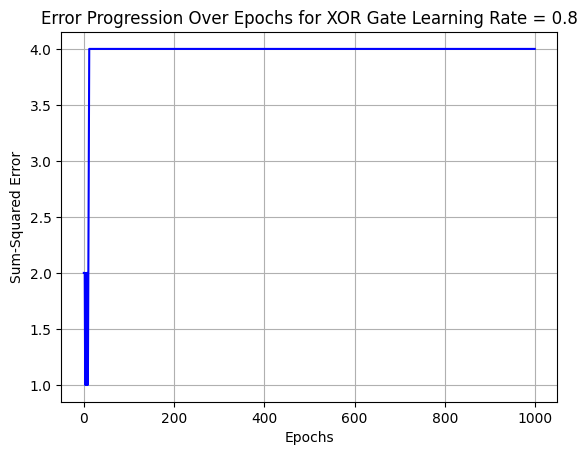

Learning Rate: 0.8
Final Weights: [1.1999999999999997, -1.4000000000000001, -1.5500000000000005]
Total Epochs: 1000


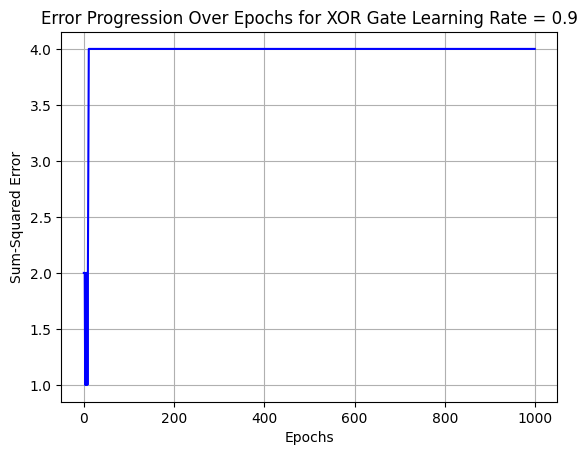

Learning Rate: 0.9
Final Weights: [0.9999999999999981, -1.6, -1.65]
Total Epochs: 1000


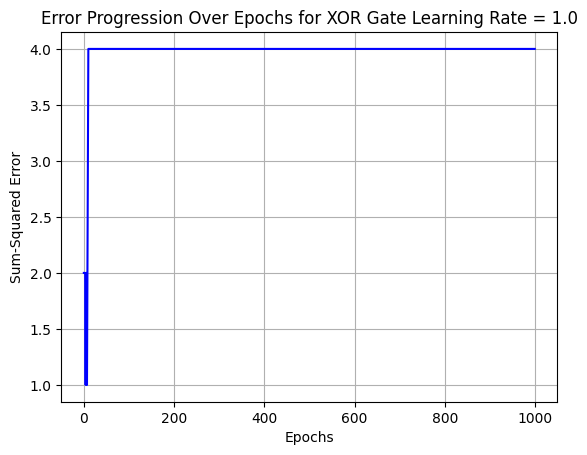

Learning Rate: 1.0
Final Weights: [1.0, -1.7999999999999998, -1.75]
Total Epochs: 1000


In [123]:
# Learning rates to test
learningRates = [0.1 * i for i in range(1, 11)]

# Store the results for each learning rate
results = {}

for lr in learningRates:
    finalWeights, errorProgression, totalEpochs = perceptronXorGate(xorGateInputs, initialWeights, lr)
    results[lr] = {
        "finalWeights": finalWeights,
        "errorProgression": errorProgression,
        "totalEpochs": totalEpochs
    }

# Plotting the results separately for each learning rate
for lr in learningRates:
    plt.figure()
    plt.plot(range(results[lr]['totalEpochs']), results[lr]['errorProgression'], linestyle='-', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title(f'Error Progression Over Epochs for XOR Gate Learning Rate = {lr}')
    plt.grid(True)
    plt.show()

    print(f"Learning Rate: {lr}")
    print("Final Weights:", results[lr]['finalWeights'])
    print("Total Epochs:", results[lr]['totalEpochs'])
    print("="*50)

Final Weights: [0.87333607 2.68219961 2.62802516 0.87948023]
Final Bias: -0.26183699142350564
Total Epochs: 999


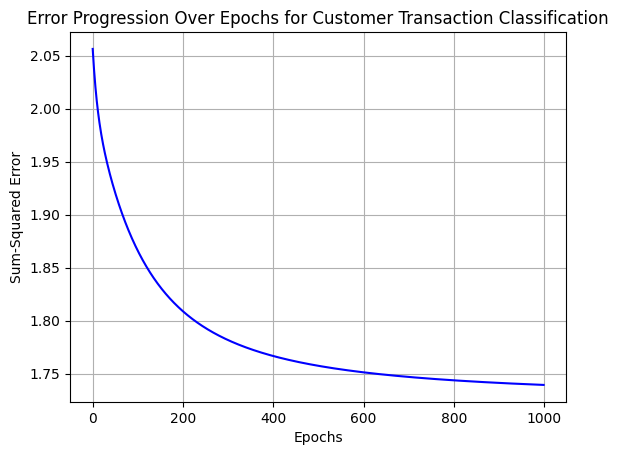

In [124]:


# Derivative of the sigmoid function
def sigmoidDerivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Function to train the perceptron
def trainPerceptron(data, learningRate=0.1, epochs=1000):
    # Initialize weights and bias
    numFeatures = len(data[0]) - 1  # Subtract 1 for the label column
    weights = np.random.rand(numFeatures)
    bias = np.random.rand(1)[0]

    errorProgression = []

    for epoch in range(epochs):
        totalError = 0
        for customer in data:
            # Extract features and label
            features = np.array(customer[:-1])
            trueLabel = customer[-1]
            
            # Calculate weighted sum
            weightedSum = np.dot(features, weights) + bias
            
            # Apply sigmoid activation function
            prediction = sigmoid(weightedSum)
            
            # Calculate error
            error = trueLabel - prediction
            
            # Update weights and bias using gradient descent
            weights += learningRate * error * sigmoidDerivative(weightedSum) * features
            bias += learningRate * error * sigmoidDerivative(weightedSum)
            
            # Accumulate the squared error for plotting
            totalError += error ** 2
        
        # Append the total error for the current epoch
        errorProgression.append(totalError)

        # Stop if error is small enough
        if totalError <= 0.002:
            print(f"Convergence reached at epoch {epoch}")
            break

    return weights, bias, errorProgression, epoch

# Customer data
customerData = [
    [20, 6, 2, 386, 1], [16, 3, 6, 289, 1], [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0], [24, 4, 2, 280, 1], [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1], [18, 4, 2, 274, 1], [21, 1, 4, 148, 0], [16, 2, 4, 198, 0]
]

# Normalize the data (optional, but recommended)
customerData = np.array(customerData)
customerData[:, :-1] = customerData[:, :-1] / customerData[:, :-1].max(axis=0)

# Train the perceptron with sigmoid activation
learningRate = 0.1
weights, bias, errorProgression, totalEpochs = trainPerceptron(customerData, learningRate)

# Print results
print("Final Weights:", weights)
print("Final Bias:", bias)
print("Total Epochs:", totalEpochs)

# Plotting the error progression
plt.plot(range(totalEpochs + 1), errorProgression, linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Progression Over Epochs for Customer Transaction Classification')
plt.grid(True)
plt.show()


In [125]:
import numpy as np

# Customer data
customerData = [
    [20, 6, 2, 386, 1], [16, 3, 6, 289, 1], [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0], [24, 4, 2, 280, 1], [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1], [18, 4, 2, 274, 1], [21, 1, 4, 148, 0], [16, 2, 4, 198, 0]
]

# Normalize the data (optional, but recommended)
customerData = np.array(customerData)
X = customerData[:, :-1]
X = X / X.max(axis=0)
y = customerData[:, -1]

# Add a bias term to the features
XB = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias unit (column of ones)

# Matrix pseudo-inverse method
pseudoInverseWeights = np.linalg.pinv(XB.T @ XB) @ XB.T @ y

# Predictions using pseudo-inverse weights
pseudoPredictions = sigmoid(XB @ pseudoInverseWeights)

# Rounding to 0 or 1
pseudoPredictions = np.round(pseudoPredictions)

print("Pseudo-Inverse Weights:", pseudoInverseWeights)
print("Pseudo-Inverse Predictions:", pseudoPredictions)
print("Actual Labels:", y)


Pseudo-Inverse Weights: [ 0.1139903  -0.68376335  0.93806344  0.01866877  0.7458411 ]
Pseudo-Inverse Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Actual Labels: [1 1 1 0 1 0 1 1 0 0]


In [126]:
import numpy as np


# Function to train a neural network with backpropagation
def trainNeuralNetwork(X, y, learningRate=0.05, epochs=1000):
    inputSize = X.shape[1]
    hiddenSize = 2
    outputSize = 1

    # Initialize weights
    weightsInputHidden = np.random.rand(inputSize, hiddenSize)
    weightsHiddenOutput = np.random.rand(hiddenSize, outputSize)

    for epoch in range(epochs):
        # Forward pass
        hiddenInput = np.dot(X, weightsInputHidden)
        hiddenOutput = sigmoid(hiddenInput)

        finalInput = np.dot(hiddenOutput, weightsHiddenOutput)
        finalOutput = sigmoid(finalInput)

        # Calculate the error
        error = y - finalOutput

        # Backpropagation
        dOutput = error * sigmoidDerivative(finalOutput)
        errorHiddenLayer = dOutput.dot(weightsHiddenOutput.T)
        dHiddenLayer = errorHiddenLayer * sigmoidDerivative(hiddenOutput)

        # Update weights
        weightsHiddenOutput += hiddenOutput.T.dot(dOutput) * learningRate
        weightsInputHidden += X.T.dot(dHiddenLayer) * learningRate

        # Stop if error is small enough
        if np.mean(np.abs(error)) <= 0.002:
            print(f"Convergence reached at epoch {epoch}")
            break

    return weightsInputHidden, weightsHiddenOutput, epoch

# AND gate data
XAnd = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
yAnd = np.array([[0], [0], [0], [1]])

# Train the neural network
learningRate = 0.05
weightsInputHidden, weightsHiddenOutput, totalEpochs = trainNeuralNetwork(XAnd, yAnd, learningRate)

# Print results
print("Final Weights (Input to Hidden):", weightsInputHidden)
print("Final Weights (Hidden to Output):", weightsHiddenOutput)
print("Total Epochs:", totalEpochs)


Final Weights (Input to Hidden): [[-0.29651418 -0.20936147]
 [ 0.2326241  -0.23590653]]
Final Weights (Hidden to Output): [[-0.85285298]
 [-1.19763403]]
Total Epochs: 999


In [127]:
# XOR gate data
XXor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
yXor = np.array([[0], [1], [1], [0]])

# Train the neural network for XOR gate
weightsInputHidden, weightsHiddenOutput, totalEpochs = trainNeuralNetwork(XXor, yXor, learningRate)

# Print results
print("Final Weights (Input to Hidden):", weightsInputHidden)
print("Final Weights (Hidden to Output):", weightsHiddenOutput)
print("Total Epochs:", totalEpochs)


Final Weights (Input to Hidden): [[0.76344294 0.26128978]
 [0.68765722 0.99203649]]
Final Weights (Hidden to Output): [[ 0.29936381]
 [-0.27720102]]
Total Epochs: 999


In [128]:
# Multi-output for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
yMulti = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # Multi-output: [O1, O2]

# Train the neural network for multi-output
inputSize = X.shape[1]
hiddenSize = 2
outputSize = 2

weightsInputHidden = np.random.rand(inputSize, hiddenSize)
weightsHiddenOutput = np.random.rand(hiddenSize, outputSize)
epochs=1000
for epoch in range(epochs):
    # Forward pass
    hiddenInput = np.dot(X, weightsInputHidden)
    hiddenOutput = sigmoid(hiddenInput)

    finalInput = np.dot(hiddenOutput, weightsHiddenOutput)
    finalOutput = sigmoid(finalInput)

    # Calculate the error
    error = yMulti - finalOutput

    # Backpropagation
    dOutput = error * sigmoidDerivative(finalOutput)
    errorHiddenLayer = dOutput.dot(weightsHiddenOutput.T)
    dHiddenLayer = errorHiddenLayer * sigmoidDerivative(hiddenOutput)

    # Update weights
    weightsHiddenOutput += hiddenOutput.T.dot(dOutput) * learningRate
    weightsInputHidden += X.T.dot(dHiddenLayer) * learningRate

    # Stop if error is small enough
    if np.mean(np.abs(error)) <= 0.002:
        print(f"Convergence reached at epoch {epoch}")
        break

print("Final Weights (Input to Hidden):", weightsInputHidden)
print("Final Weights (Hidden to Output):", weightsHiddenOutput)
print("Total Epochs:", epoch)


Final Weights (Input to Hidden): [[-2.0042788  -0.75663467]
 [-1.9587782  -0.55323215]]
Final Weights (Hidden to Output): [[ 2.51312995 -2.00375376]
 [ 1.06834994 -1.55630546]]
Total Epochs: 999


In [129]:
from sklearn.neural_network import MLPClassifier

# AND gate using MLPClassifier
XAnd = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
yAnd = np.array([0, 0, 0, 1])

mlpAnd = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05)
mlpAnd.fit(XAnd, yAnd)
andPredictions = mlpAnd.predict(XAnd)

print("MLP AND Predictions:", andPredictions)
print("Actual AND:", yAnd)

# XOR gate using MLPClassifier
XXor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
yXor = np.array([0, 1, 1, 0])

mlpXor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05)
mlpXor.fit(XXor, yXor)
xorPredictions = mlpXor.predict(XXor)

print("MLP XOR Predictions:", xorPredictions)
print("Actual XOR:", yXor)


MLP AND Predictions: [0 0 0 1]
Actual AND: [0 0 0 1]
MLP XOR Predictions: [0 0 1 1]
Actual XOR: [0 1 1 0]


In [130]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
from scipy import fft

fakeDir='E:\zipp\college\Third Year\\5th Sem\ML\ML\Lab 3\\train\FAKE'
realDir='E:\zipp\college\Third Year\\5th Sem\ML\ML\Lab 3\\train\REAL'
    
numImagesToLoad = 10000

In [131]:
def toGray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [132]:
def loadImgWithFeatures(filepath, label):
    img = cv2.imread(filepath)
    grayImg = toGray(img)
    features = np.abs(fft.fft2(grayImg)).flatten()
    return features, label

In [133]:
def loadImgsFromDirectory(directory, label, numImages=None):
    images = []
    labels = []
    files = os.listdir(directory)
    if numImages is not None:
        files = files[:numImages]
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(loadImgWithFeatures, os.path.join(directory, filename), label) for filename
                   in files]
        for future in as_completed(futures):
            features, lbl = future.result()
            images.append(features)
            labels.append(lbl)
    return images, labels

In [134]:
fakeImages, fakeLabels = loadImgsFromDirectory(fakeDir, 0, numImages=numImagesToLoad)
realImages, realLabels = loadImgsFromDirectory(realDir, 1, numImages=numImagesToLoad)

features = np.vstack((fakeImages, realImages))
labels = np.concatenate((fakeLabels, realLabels))

In [135]:
XTrain, XTest, yTrain, yTest = train_test_split(features, labels, test_size=0.2, random_state=32)

MLP Project Predictions: [1 1 1 ... 1 1 1]
Actual Project Labels: [0 1 0 ... 0 0 1]
Accuracy: 0.5011
Precision: 0.2511
Recall: 0.5011
F1-Score: 0.3345

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7983
           1       0.50      1.00      0.67      8017

    accuracy                           0.50     16000
   macro avg       0.25      0.50      0.33     16000
weighted avg       0.25      0.50      0.33     16000



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: Unde

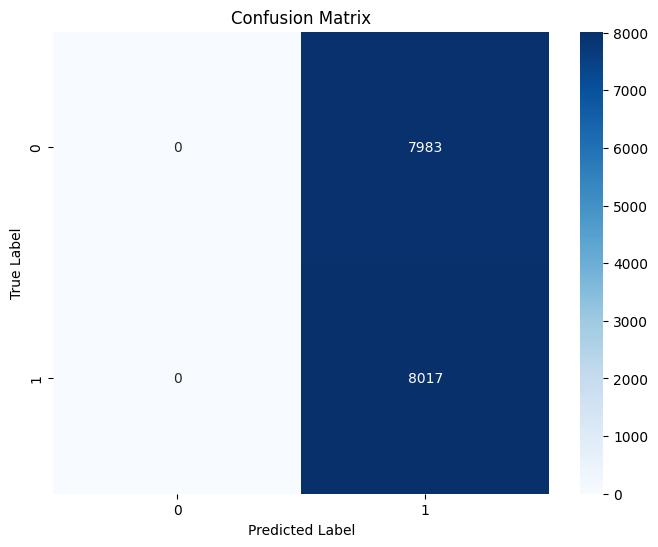

In [147]:
mlpProject = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', max_iter=1000, learning_rate_init=0.05)
mlpProject.fit(XTrain, yTrain)
projectPredictions = mlpProject.predict(XTrain)

print("MLP Project Predictions:", projectPredictions)
print("Actual Project Labels:", yTrain)

accuracy = accuracy_score(yTrain, projectPredictions)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1-Score
precision = precision_score(yTrain, projectPredictions, average='weighted')
recall = recall_score(yTrain, projectPredictions, average='weighted')
f1 = f1_score(yTrain, projectPredictions, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(yTrain, projectPredictions))

# Generate the confusion matrix
confMatrix = confusion_matrix(yTrain, projectPredictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confMatrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

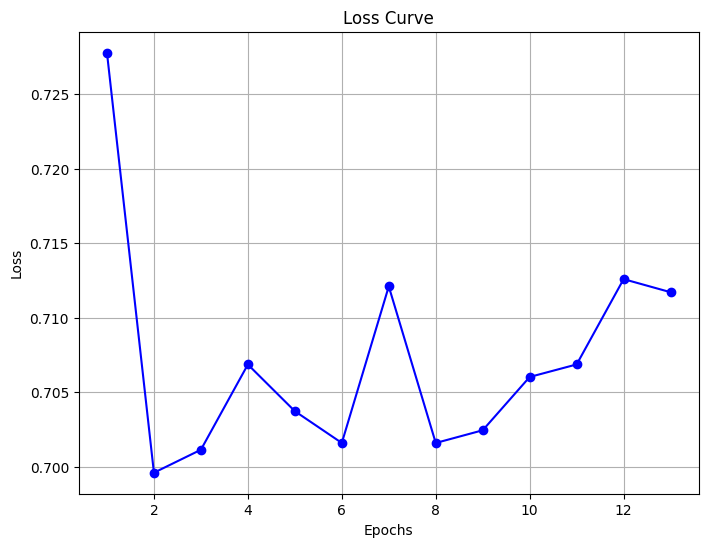

In [137]:
# Access the loss curve from the trained model
lossValues = mlpProject.loss_curve_

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(lossValues) + 1), lossValues, marker='o', linestyle='-', color='b')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: Unde

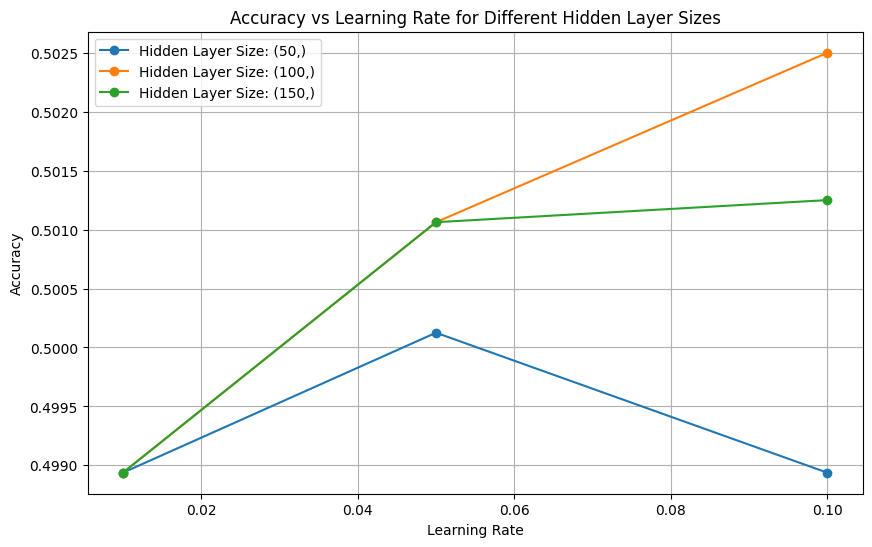

In [139]:
hiddenLayerSizes = [(50,), (100,), (150,)]
learningRates = [0.01, 0.05, 0.1]

results = []

for size in hiddenLayerSizes:
    for lr in learningRates:
        mlp = MLPClassifier(hidden_layer_sizes=size, activation='logistic', max_iter=1000, learning_rate_init=lr)
        mlp.fit(XTrain, yTrain)
        predictions = mlp.predict(XTrain)
        
        accuracy = accuracy_score(yTrain, predictions)
        precision = precision_score(yTrain, predictions, average='weighted')
        recall = recall_score(yTrain, predictions, average='weighted')
        f1 = f1_score(yTrain, predictions, average='weighted')
        
        results.append({
            'hiddenLayerSize': size,
            'learningRate': lr,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1Score': f1
        })

# Convert results to a structured format (e.g., DataFrame) and plot


resultsDf = pd.DataFrame(results)

# Plotting accuracy vs different configurations
plt.figure(figsize=(10, 6))
for size in hiddenLayerSizes:
    subset = resultsDf[resultsDf['hiddenLayerSize'] == size]
    plt.plot(subset['learningRate'], subset['accuracy'], marker='o', label=f'Hidden Layer Size: {size}')
plt.title('Accuracy vs Learning Rate for Different Hidden Layer Sizes')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
